In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../../../'))

import numpy as np
import arrayfire as af
from matplotlib import pyplot as plt

from dg_maxwell import params
from dg_maxwell import msh_parser
from dg_maxwell import advection_2d
from dg_maxwell import global_variables as gvar
from dg_maxwell import utils
from dg_maxwell import wave_equation_2d
from dg_maxwell import isoparam
from dg_maxwell import lagrange
from dg_maxwell import advection_2d_arbit_mesh as a2d_arbit_mesh

af.set_backend(params.backend)
af.set_device(params.device)

plt.rcParams['figure.figsize']     = 12, 7.5
plt.rcParams['lines.linewidth']    = 1.5
plt.rcParams['font.family']        = 'serif'
plt.rcParams['font.weight']        = 'bold'
plt.rcParams['font.size']          = 20  
plt.rcParams['font.sans-serif']    = 'serif'
plt.rcParams['text.usetex']        = True
plt.rcParams['axes.linewidth']     = 1.5
plt.rcParams['axes.titlesize']     = 'medium'
plt.rcParams['axes.labelsize']     = 'medium'

plt.rcParams['xtick.major.size']   = 8
plt.rcParams['xtick.minor.size']   = 4
plt.rcParams['xtick.major.pad']    = 8
plt.rcParams['xtick.minor.pad']    = 8
plt.rcParams['xtick.color']        = 'k'
plt.rcParams['xtick.labelsize']    = 'medium'
plt.rcParams['xtick.direction']    = 'in'    

plt.rcParams['ytick.major.size']   = 8
plt.rcParams['ytick.minor.size']   = 4
plt.rcParams['ytick.major.pad']    = 8
plt.rcParams['ytick.minor.pad']    = 8
plt.rcParams['ytick.color']        = 'k'
plt.rcParams['ytick.labelsize']    = 'medium'
plt.rcParams['ytick.direction']    = 'in'
plt.rcParams['text.usetex']        = True
plt.rcParams['text.latex.unicode'] = True

gmshtranslator friendly reminder: rules and actions prototypes


def node_condition(tag,x,y,z,physgroups): 
def node_action(tag,x,y,z):
def element_condition(eletag,eletype,physgrp,nodes):
def element_action(eletag,eletype,physgrp,nodes):


In [2]:
params.mesh_file = '../../read_and_plot_mesh/mesh/square_mesh_4_parts.msh'
advec_var = gvar.advection_variables(params.N_LGL, params.N_quad,
                                     params.x_nodes, params.N_Elements,
                                     params.c, params.total_time, params.wave,
                                     params.c_x, params.c_y, params.courant,
                                     params.mesh_file, params.total_time_2d)

gmshTranslator: Initializing...
gmshTranslator: Mesh has 81 nodes.
gmshTranslator: Mesh has 49 elements.
gmshTranslator: Processed 134 lines.
gmshTranslator: There are 1 physical groups available: 
gmshTranslator:      > 0
gmshTranslator: Parsing nodes
gmshTranslator: Parsing elements
gmshTranslator: No rules for elements... skipping elements.
gmshTranslator: Parsing nodes
gmshTranslator: No rules for nodes... skipping nodes.
gmshTranslator: Parsing elements
0 6
1 7
14 8
15 10
advection_variables __init__ completed


/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


gmshTranslator: Ending


/home/ubermensch/.local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


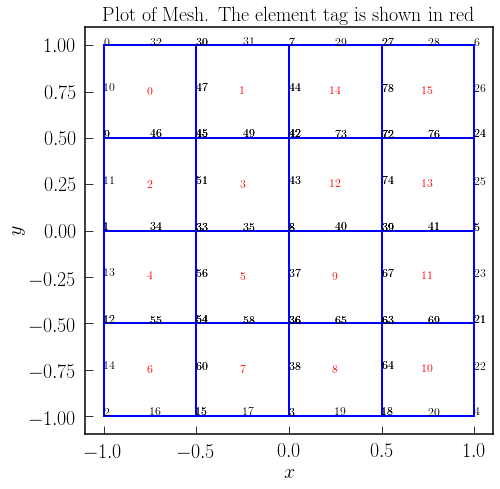

In [3]:
axes_handler = plt.axes()


msh_parser.plot_mesh_grid(advec_var.nodes, advec_var.elements,
                          advec_var.xi_LGL, advec_var.eta_LGL,
                          axes_handler, plot_LGL_grid = False,
                          print_element_tag = True,
                          print_node_tag = True)

# plt.title(r'Grid plot of a mesh for $N_{LGL} = 8$.'
#           '\n Red lines are mesh grid, and \n'
#           'blue lines are element boundaries.')
plt.title(r'Plot of Mesh. The element tag is shown in red')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axes().set_aspect('equal')

plt.savefig('square.png')
plt.show()

In [3]:
####################################################################
# Periodic boundary conditions for square 4x4 non-contiguous mesh
####################################################################

vertical_boundary_elements_pbc = [[ 0,  15],
                                  [ 2,  13],
                                  [ 4,  11],
                                  [ 6,  10]]

vertical_boundary_elements_pbc = np.array(vertical_boundary_elements_pbc)


horizontal_boundary_elements_pbc = [[ 0,   6],
                                    [ 1,   7],
                                    [14,   8],
                                    [15,  10]]

horizontal_boundary_elements_pbc = np.array(horizontal_boundary_elements_pbc)

In [6]:
interelement_relations = advec_var.interelement_relations.copy()

for vertical_boundary in vertical_boundary_elements_pbc:
    interelement_relations[vertical_boundary[0],
                           0] = vertical_boundary[1]
    interelement_relations[vertical_boundary[1],
                           2] = vertical_boundary[0]


for horizontal_boundary in horizontal_boundary_elements_pbc:
    print(horizontal_boundary[0], horizontal_boundary[1])
    interelement_relations[horizontal_boundary[0], 3] = horizontal_boundary[1]
    interelement_relations[horizontal_boundary[1], 1] = horizontal_boundary[0]

print_with_index(interelement_relations)

0 6
1 7
14 8
15 10
0 	->	15	2	1	6	
1 	->	0	3	14	7	
2 	->	13	4	3	0	
3 	->	2	5	12	1	
4 	->	11	6	5	2	
5 	->	4	7	9	3	
6 	->	10	0	7	4	
7 	->	6	1	8	5	
8 	->	7	14	10	9	
9 	->	5	8	11	12	
10 	->	8	15	6	11	
11 	->	9	10	4	13	
12 	->	3	9	13	14	
13 	->	12	11	2	15	
14 	->	1	12	15	8	
15 	->	14	13	0	10	



In [5]:
def print_with_index(datas):
    datas = np.array(datas)
    for index, row in enumerate(datas):
        print(index, '\t->', end = '\t')
        for data in row:
            print(np.round(data, 3), end = '\t')
        print()
    print()

In [5]:
print_with_index(advec_var.interelement_relations)

0 	->	15	2	1	6	
1 	->	0	3	14	7	
2 	->	13	4	3	0	
3 	->	2	5	12	1	
4 	->	11	6	5	2	
5 	->	4	7	9	3	
6 	->	10	0	7	4	
7 	->	6	1	8	5	
8 	->	14	-1	10	9	
9 	->	5	8	11	12	
10 	->	15	6	-1	11	
11 	->	9	4	-1	13	
12 	->	3	9	13	14	
13 	->	12	11	2	15	
14 	->	1	8	15	-1	
15 	->	14	10	0	-1	



In [9]:
print(af.all_true(af.abs(advec_var.interelement_relations - interelement_relations) < 1e-14))

1.0


In [49]:
elements = advec_var.elements[:, :-1].copy()

for element_tag in np.arange(8, 12):
    elements[element_tag] = np.roll(elements[element_tag], 2)

for element_tag in np.arange(12, 16):
    elements[element_tag] = np.flip(elements[element_tag], axis = 0)
#     print(elements[element_tag])
    elements[element_tag] = np.roll(elements[element_tag], 3)

advec_var.elements[:, :-1] = elements
print_with_index(advec_var.elements)


0 	->	0	10	9	46	45	47	30	32	48	
1 	->	30	47	45	49	42	44	7	31	50	
2 	->	9	11	1	34	33	51	45	46	52	
3 	->	45	51	33	35	8	43	42	49	53	
4 	->	1	13	12	55	54	56	33	34	57	
5 	->	33	56	54	58	36	37	8	35	59	
6 	->	12	14	2	16	15	60	54	55	61	
7 	->	54	60	15	17	3	38	36	58	62	
8 	->	63	65	36	38	3	19	18	64	66	
9 	->	39	40	8	37	36	65	63	67	68	
10 	->	21	69	63	64	18	20	4	22	70	
11 	->	5	41	39	67	63	69	21	23	71	
12 	->	8	43	42	73	72	74	39	40	75	
13 	->	39	74	72	76	24	25	5	41	77	
14 	->	42	44	7	29	27	78	72	73	79	
15 	->	72	78	27	28	6	26	24	76	80	

